In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd
from scipy.stats import uniform
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
import urllib.request
#urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")
df_stars 

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


Text(0.5, 1.0, 'Temperature vs Absolute Magnitude')

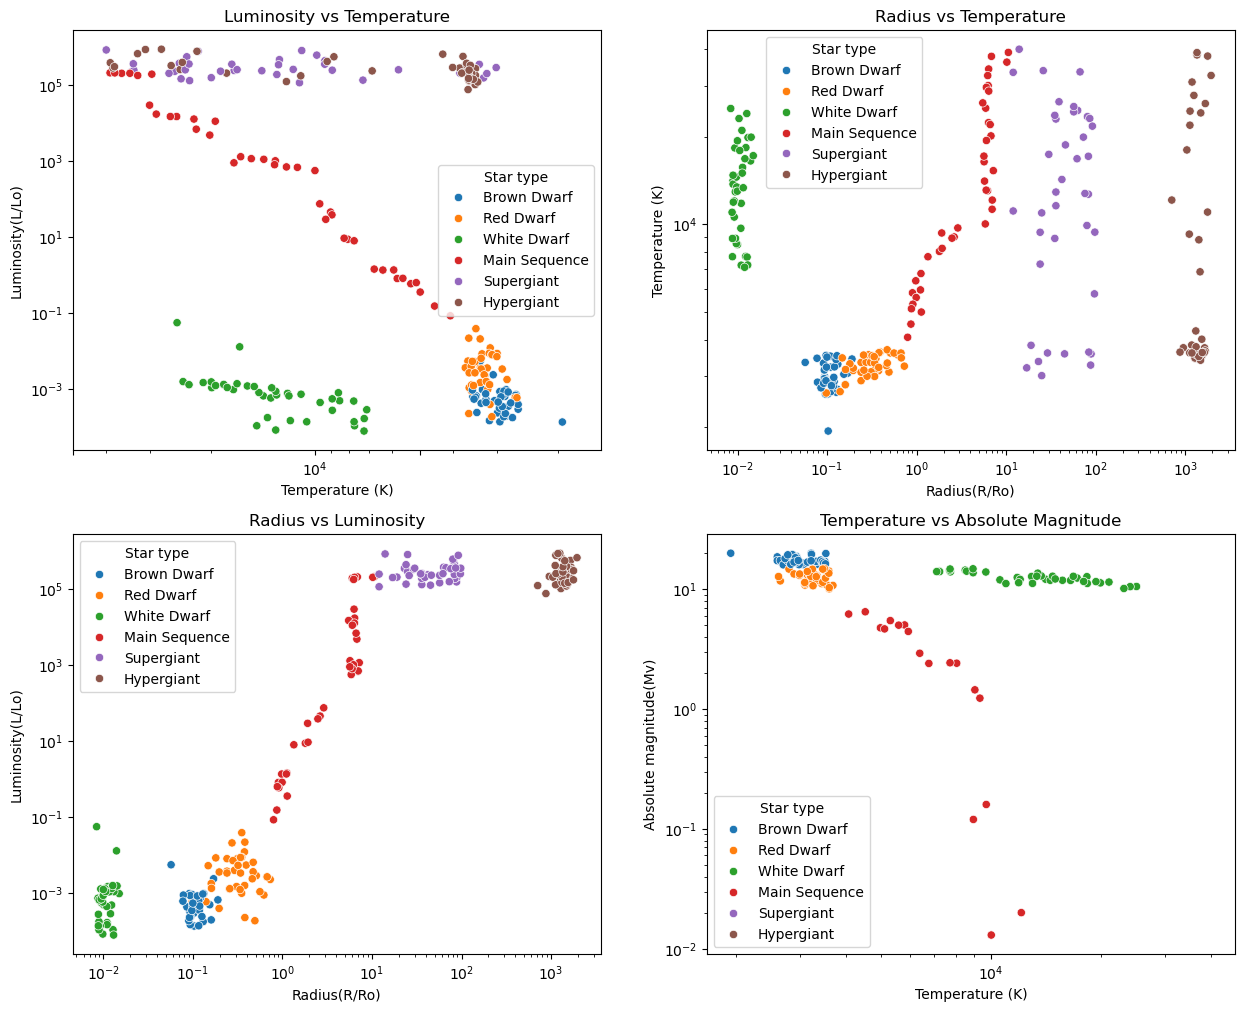

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue="Star type", ax=ax[0][0])

ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xticks([5000, 10000, 50000])
ax[0][0].set_xlim(5e4, 1.5e3)
ax[0][0].set_title('Luminosity vs Temperature')

sns.scatterplot(data=df_stars, x='Radius(R/Ro)', y='Temperature (K)', hue="Star type", ax=ax[0][1])
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_title('Radius vs Temperature')
ax[0][1].legend(title='Star type', loc='upper left', bbox_to_anchor=(0.1, 1))

sns.scatterplot(data=df_stars, x='Radius(R/Ro)', y='Luminosity(L/Lo)', hue="Star type", ax=ax[1][0])
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_title('Radius vs Luminosity')

sns.scatterplot(data=df_stars, x='Temperature (K)', y = 'Absolute magnitude(Mv)', hue="Star type", ax=ax[1][1])
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_title('Temperature vs Absolute Magnitude')



In [4]:
# Convert the data to a numpy array
data_matrix = df_stars[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].values
data_matrix = np.array(data_matrix, dtype=float)
print(data_matrix)

[[ 3.06800e+03  2.40000e-03  1.70000e-01  1.61200e+01]
 [ 3.04200e+03  5.00000e-04  1.54200e-01  1.66000e+01]
 [ 2.60000e+03  3.00000e-04  1.02000e-01  1.87000e+01]
 [ 2.80000e+03  2.00000e-04  1.60000e-01  1.66500e+01]
 [ 1.93900e+03  1.38000e-04  1.03000e-01  2.00600e+01]
 [ 2.84000e+03  6.50000e-04  1.10000e-01  1.69800e+01]
 [ 2.63700e+03  7.30000e-04  1.27000e-01  1.72200e+01]
 [ 2.60000e+03  4.00000e-04  9.60000e-02  1.74000e+01]
 [ 2.65000e+03  6.90000e-04  1.10000e-01  1.74500e+01]
 [ 2.70000e+03  1.80000e-04  1.30000e-01  1.60500e+01]
 [ 3.60000e+03  2.90000e-03  5.10000e-01  1.06900e+01]
 [ 3.12900e+03  1.22000e-02  3.76100e-01  1.17900e+01]
 [ 3.13400e+03  4.00000e-04  1.96000e-01  1.32100e+01]
 [ 3.62800e+03  5.50000e-03  3.93000e-01  1.04800e+01]
 [ 2.65000e+03  6.00000e-04  1.40000e-01  1.17820e+01]
 [ 3.34000e+03  3.80000e-03  2.40000e-01  1.30700e+01]
 [ 2.79900e+03  1.80000e-03  1.60000e-01  1.47900e+01]
 [ 3.69200e+03  3.67000e-03  4.70000e-01  1.08000e+01]
 [ 3.19200

(3, 4)


Text(0.5, 1.0, 'PCA of HR Diagram with untouched data')

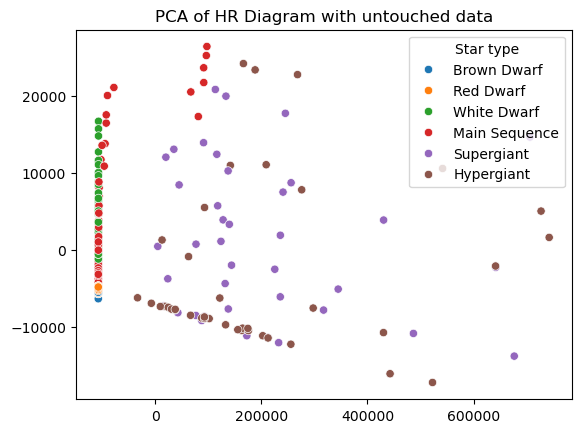

In [5]:
pca = PCA(n_components=3,svd_solver='randomized') 
pca.fit(data_matrix) 
projected_data = pca.transform(data_matrix) 
evecs = pca.components_
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()
print(evecs.shape)

'''#Reattach labels to the data
projected_data = np.hstack((eigenvals, np.array(df_stars['Star type'].values).reshape(-1, 1)))'''
#plt.figure(figsize=(10, 8))
sns.scatterplot(x =projected_data[:,0], y = projected_data[:,1], hue = df_stars['Star type'])
plt.title('PCA of HR Diagram with untouched data')


Variance explained by the three first principal components:  0.9318782024519132


Text(0.5, 1.0, 'PCA of HR diagram with centered and normalized data')

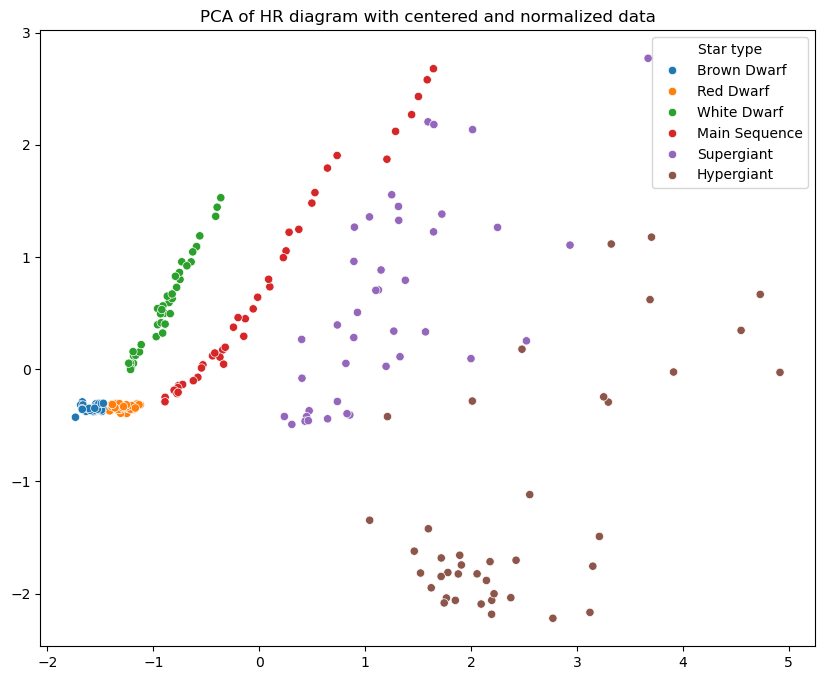

In [ ]:
'''#center the data and normalize it manually
data_matrix =data_matrix - np.mean(data_matrix, axis=0)
data_matrix = -data_matrix/ np.std(data_matrix, axis=0)'''

#do the same thing with sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix)

# Perform PCA
pca = PCA(n_components=3,svd_solver='randomized')
pca.fit(data_matrix)
projected_data = pca.transform(data_matrix)
evecs = pca.components_
evals = pca.explained_variance_ratio_
evals_cs = sum(evals) 

print("Variance ratio explained by the three first principal components: ", evals_cs)

'''#Reattach labels to the data
projected_data = np.hstack((eigenvals, np.array(df_stars['Star type'].values).reshape(-1, 1)))'''

plt.figure(figsize=(10, 8))
sns.scatterplot(x =-projected_data[:,0], y = projected_data[:,1], hue = df_stars['Star type'])
plt.title('PCA of HR diagram with centered and normalized data')
